<a href="https://colab.research.google.com/github/yaman9675/PCA-on-Boston-Housing/blob/main/M4W6D3_Assignment_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>MEDV is the dependent variable.

## In the linear regression assignment, you were not able to take care of the multicollinearity. Use principal component analysis to come up with linearly uncorrelated variables and run linear regression with regularization with these new features. You can experiment around with different degrees of variance you want to retain in the data.</b>

#<b>Import libraries

In [ ]:
!pip install klib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib         #librarie to make a visualization of all the column

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#<b>Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#<b>Import Dataset

In [ ]:
# Importing the dataset
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
boston = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/housing.csv' ,sep ='\s+', names = columns)

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.shape

(506, 14)

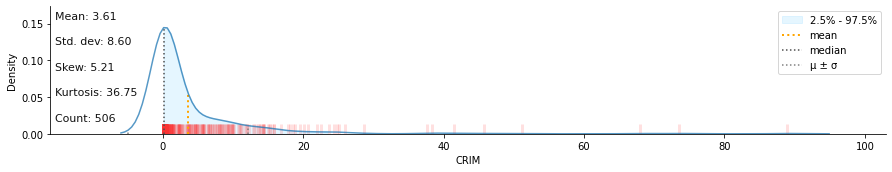

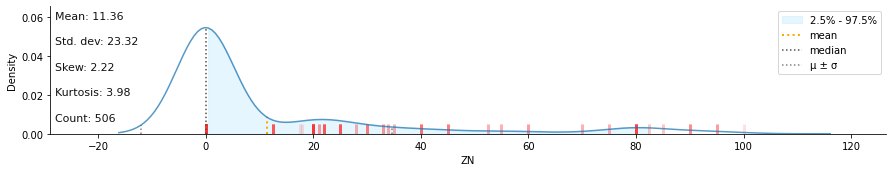

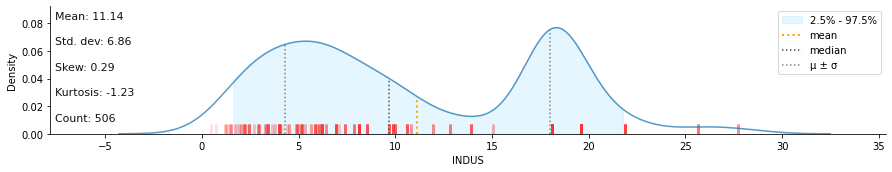

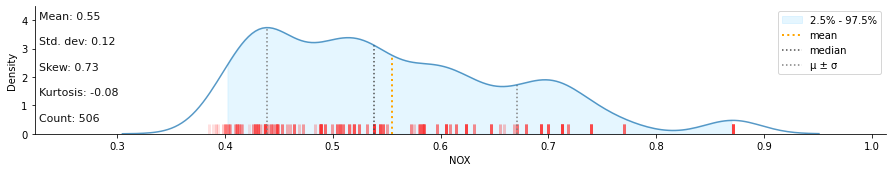

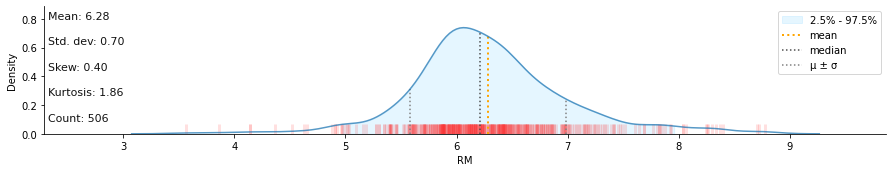

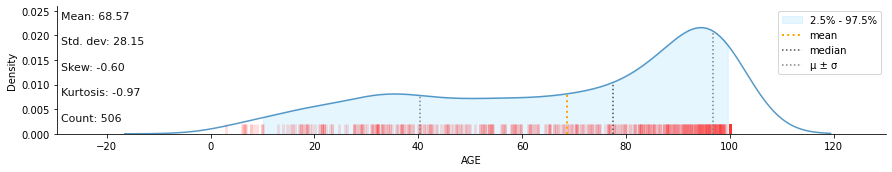

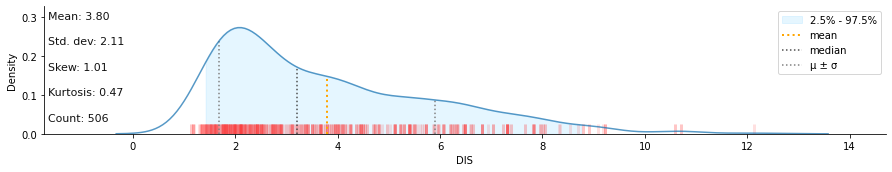

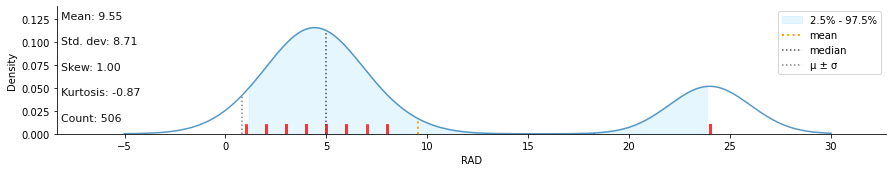

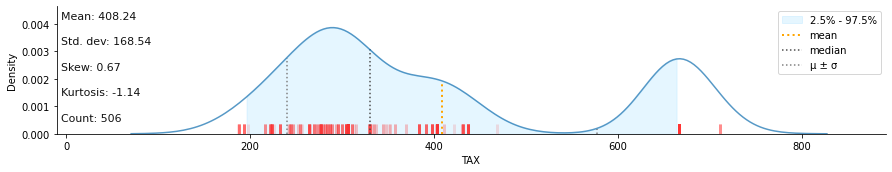

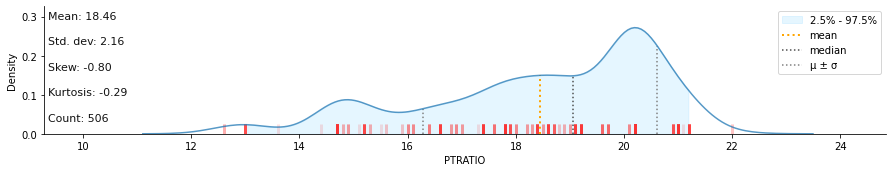

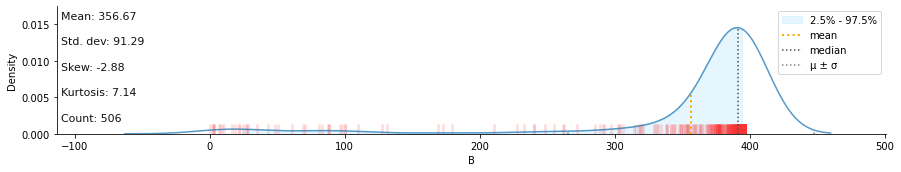

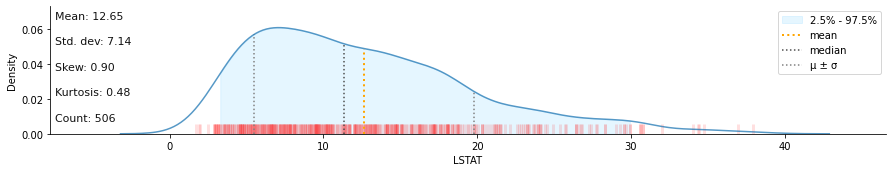

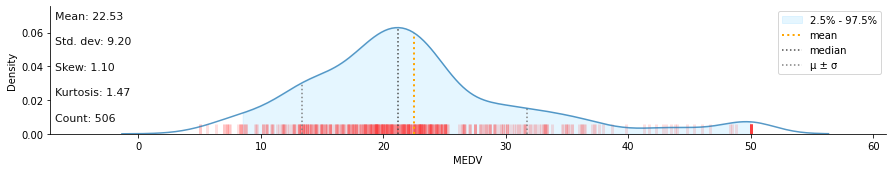

In [ ]:
# default representation of a distribution plot
klib.dist_plot(boston)

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



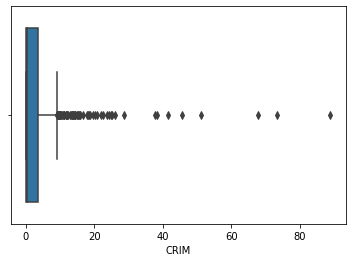

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



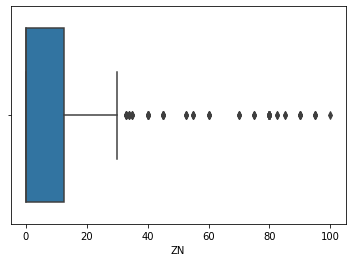

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



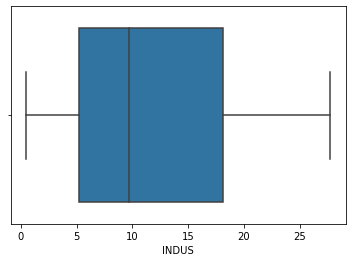

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



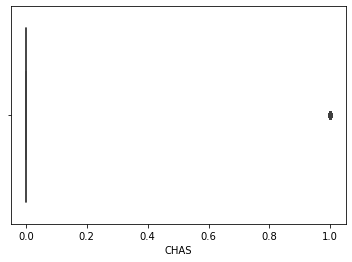

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



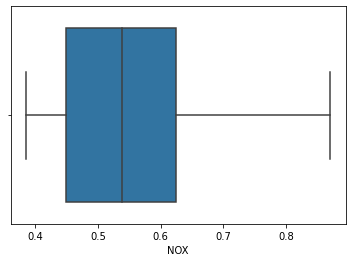

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



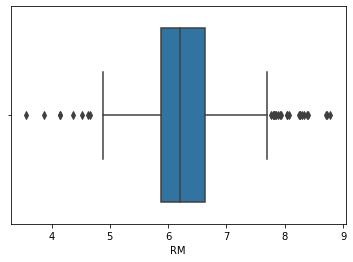

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



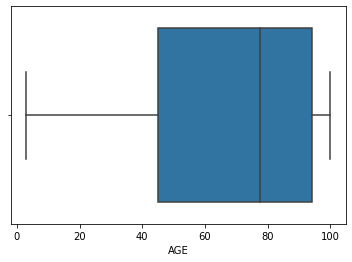

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



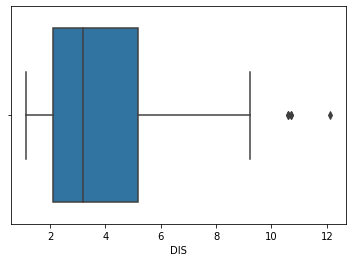

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



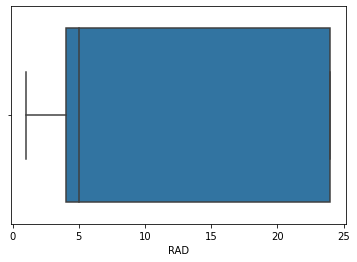

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



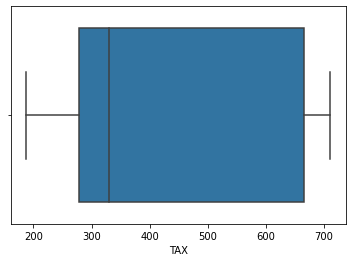

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



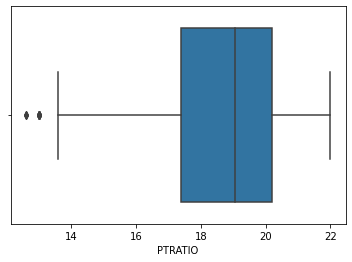

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



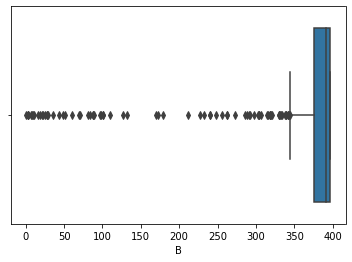

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



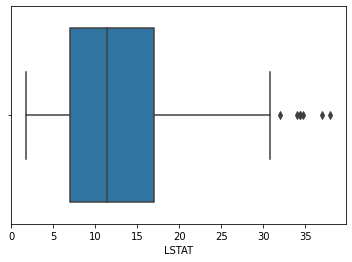

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



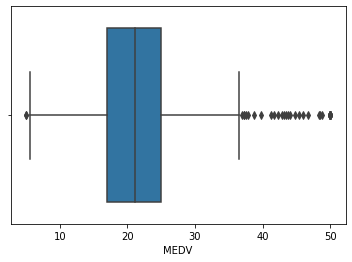

<Figure size 432x432 with 0 Axes>

In [ ]:
boston_columns  = boston.columns
for col in boston_columns:
  sns.boxplot(boston[col])
  plt.figure(figsize=(6,6))
  plt.show()

<B>Outlires

In [ ]:
new_boston = boston.copy()
new_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Handling Outlires
new_boston = new_boston[new_boston.CRIM <= 20]
new_boston = new_boston[new_boston.ZN < 40]
new_boston = new_boston[new_boston.DIS < 10]
new_boston = new_boston[new_boston.PTRATIO > 13.2]
new_boston = new_boston[new_boston.B > 344]
new_boston = new_boston[new_boston.LSTAT < 31.96]

new_boston = new_boston[(new_boston.RM > 4) & (new_boston.RM < 8)]
new_boston = new_boston[(new_boston.MEDV > 5) & (new_boston.RM < 37)]

In [ ]:
new_boston.shape

(338, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



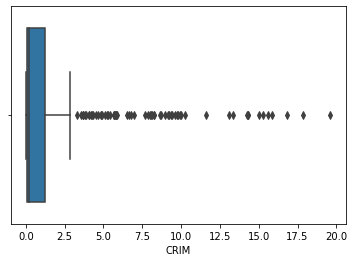

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



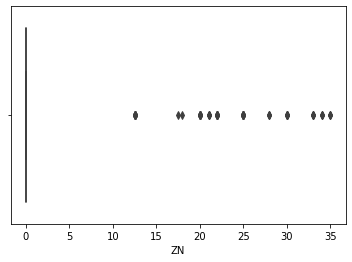

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



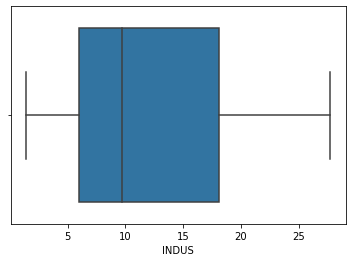

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



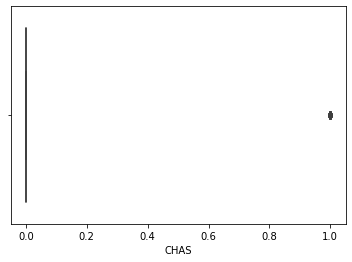

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



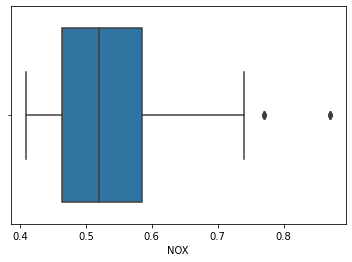

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



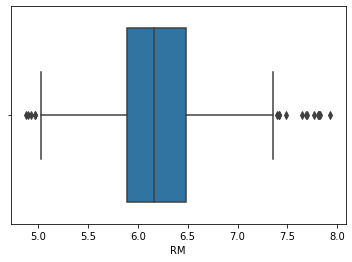

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



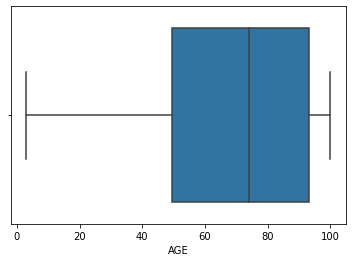

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



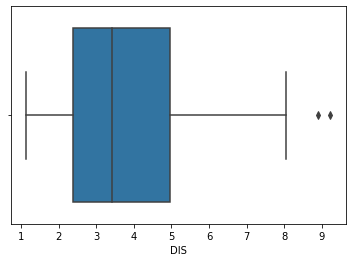

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



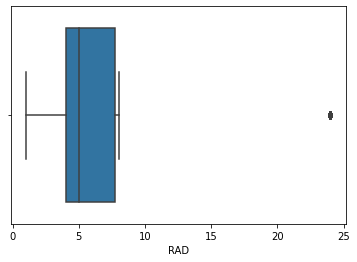

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



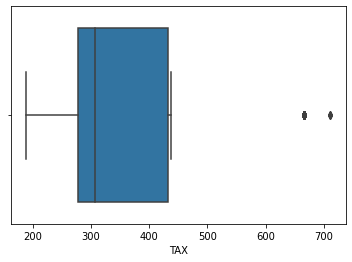

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



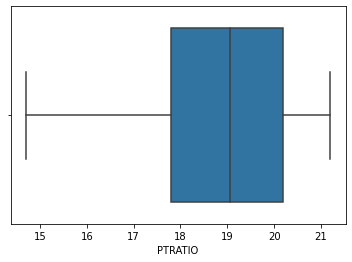

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



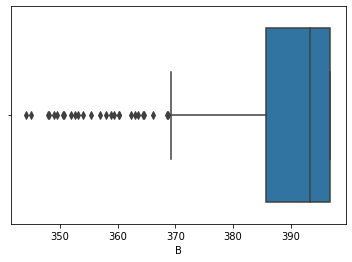

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



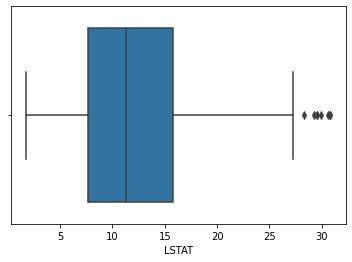

<Figure size 432x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



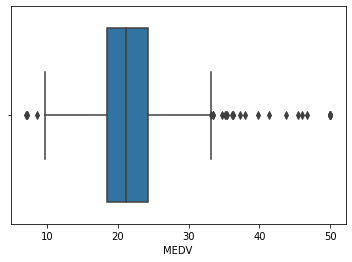

<Figure size 432x432 with 0 Axes>

In [ ]:
new_boston_columns  = new_boston.columns
for col in new_boston_columns:
  sns.boxplot(new_boston[col])
  plt.figure(figsize=(6,6))
  plt.show()

In [ ]:
#Removing outlires seperate the target variable
new_medv = new_boston.MEDV
new_medv.head

<bound method NDFrame.head of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 338, dtype: float64>

In [ ]:
new_boston.drop('MEDV', axis=1, inplace = True)

##<B>After Removing Target Variable we will start the process for PCA

In [ ]:
#Storing dataframe name ino feature
features = new_boston.columns
features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

<b>Normalizing the Dataset by Using StandardScaler

In [ ]:
x = new_boston.loc[:, features].values #inserting the values of the feature 
x = StandardScaler().fit_transform(x) # normalizing the features

In [ ]:
#Renaimimg the feature after normalising
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_results = pd.DataFrame(x,columns=feat_cols)

In [ ]:
#Tail of the data after normalised
normalised_results.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
333,-0.498032,-0.456028,0.128626,-0.282617,0.278,0.692504,0.014700,-0.734157,-0.933842,-0.689288,1.273128,0.308324,-0.432203
334,-0.502827,-0.456028,0.128626,-0.282617,0.278,-0.196382,0.299253,-0.842659,-0.933842,-0.689288,1.273128,0.725194,-0.531008
335,-0.498548,-0.456028,0.128626,-0.282617,0.278,1.412258,0.834663,-0.910793,-0.933842,-0.689288,1.273128,0.725194,-1.107087
336,-0.485060,-0.456028,0.128626,-0.282617,0.278,1.070234,0.771013,-0.785087,-0.933842,-0.689288,1.273128,0.432281,-0.966417
337,-0.502236,-0.456028,0.128626,-0.282617,0.278,-0.365515,0.452762,-0.719168,-0.933842,-0.689288,1.273128,0.725194,-0.731966


<b>PCA as dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA   #import PCA
pca_results = PCA()
principalComponents_results = pca_results.fit_transform(x)  #Fit PCA on the independent features

In [ ]:
#Lets see the cumulative variation of the feature after appling PCA
print('Cumulative Explained variation per principal component: {}'.format(pca_results.explained_variance_ratio_.cumsum()))

Cumulative Explained variation per principal component: [0.41993153 0.53448507 0.633427   0.71934204 0.78875722 0.84962619
 0.89328382 0.92869684 0.9490913  0.96838394 0.9829693  0.99472436
 1.        ]


In [ ]:
pca_results_revised = PCA(n_components=8)
principalComponents_results = pca_results_revised.fit_transform(x)
print('Cumulative Explained variation per principal component: {}'.format(pca_results_revised.explained_variance_ratio_.cumsum()))

Cumulative Explained variation per principal component: [0.41993153 0.53448507 0.633427   0.71934204 0.78875722 0.84962619
 0.89328382 0.92869684]


In [ ]:
principal_results_Df = pd.DataFrame(data = principalComponents_results, 
                                    columns = ['principal_component_1', 'principal_component_2','principal_component_3', 'principal_component_4',
                                               'principal_component_5', 'principal_component_6','principal_component_7', 'principal_component_8'])
principal_results_Df.head()

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8
0,-2.445326,0.388683,0.895900,0.315229,0.170738,-1.804291,-0.193364,-0.092648
1,-1.622291,-0.439457,0.298090,-0.848553,-0.013665,-0.387363,-0.051091,-0.582841
2,-2.230389,0.762467,1.079116,-1.018998,-0.735294,-0.191221,-0.088380,-0.366452
3,-2.841444,0.997054,0.356445,-1.089000,-0.454075,0.397094,-0.306606,-0.665291
4,-2.689452,0.931503,0.428987,-1.224661,-0.274789,0.135191,-0.050763,-0.877310


In [ ]:
principal_results_Df.shape

(338, 8)

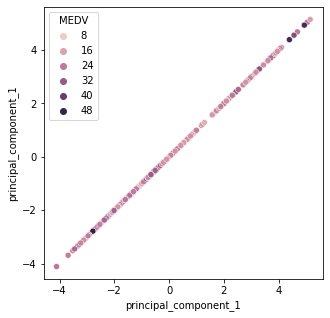

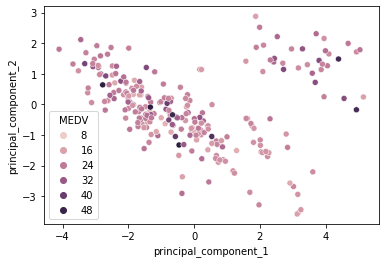

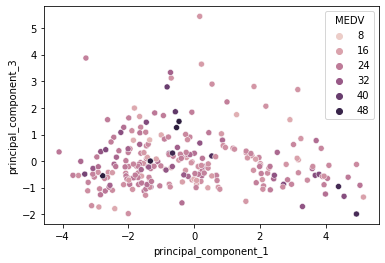

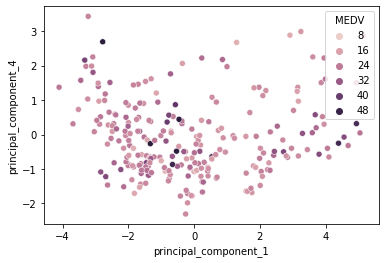

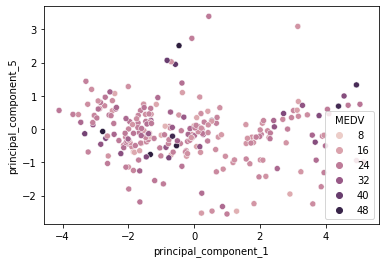

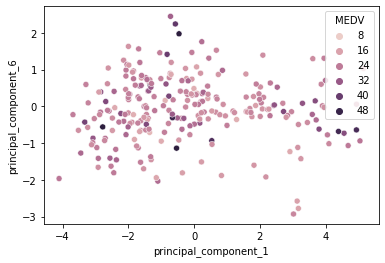

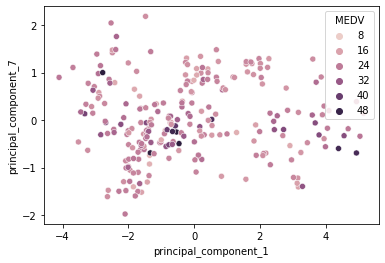

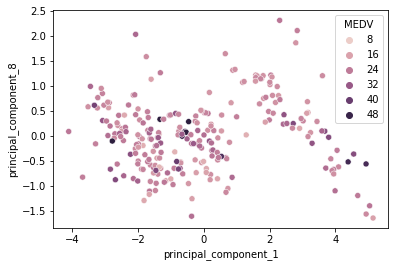

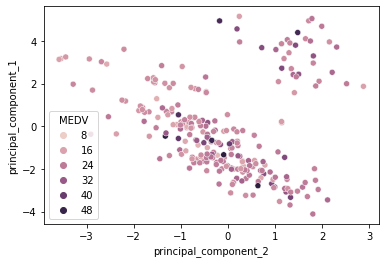

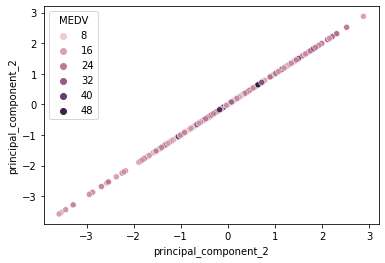

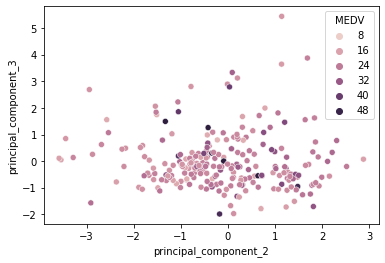

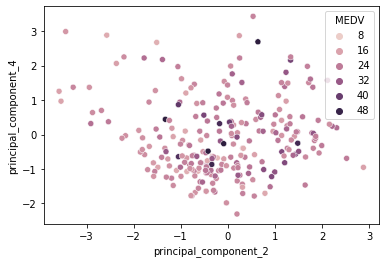

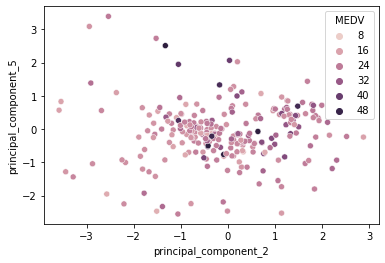

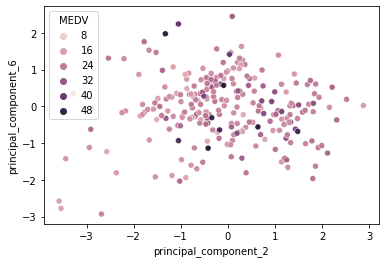

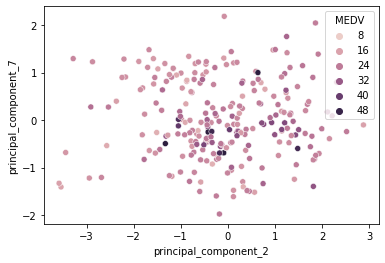

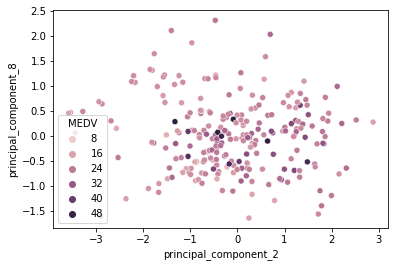

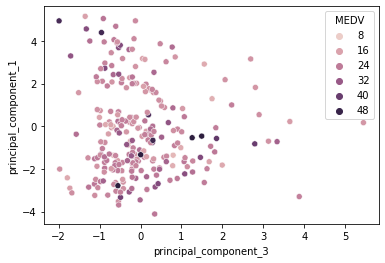

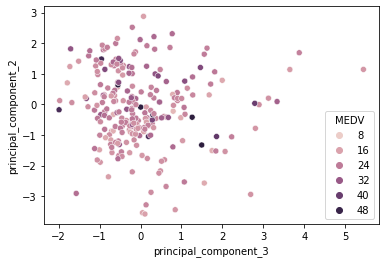

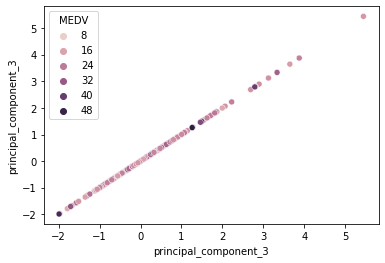

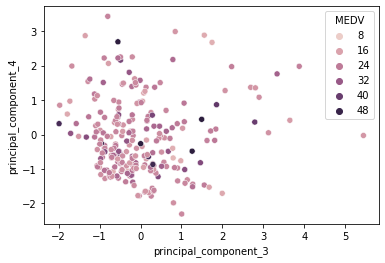

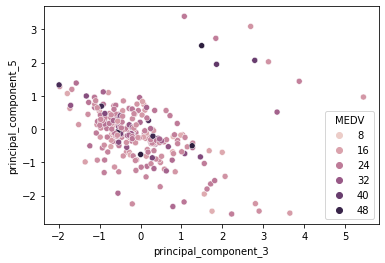

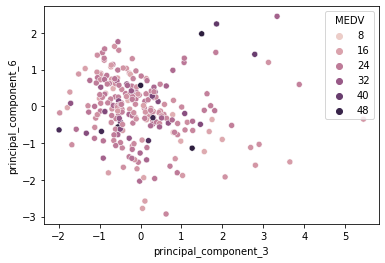

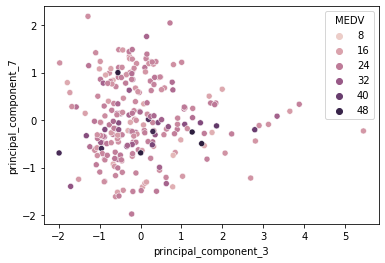

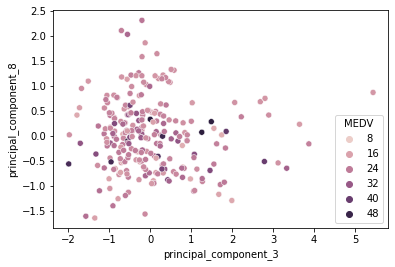

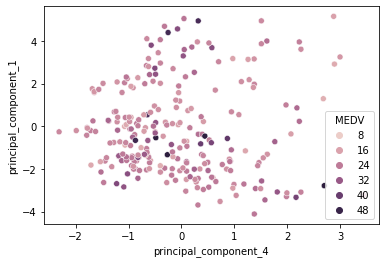

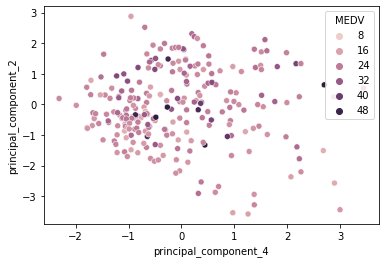

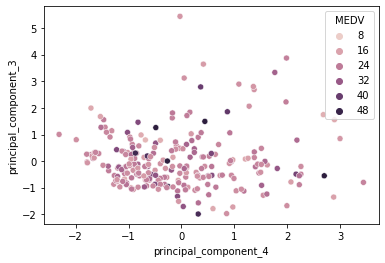

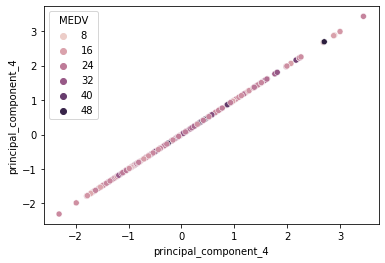

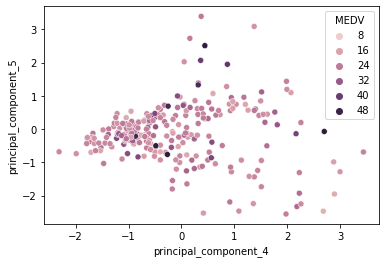

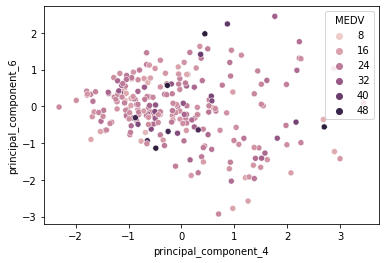

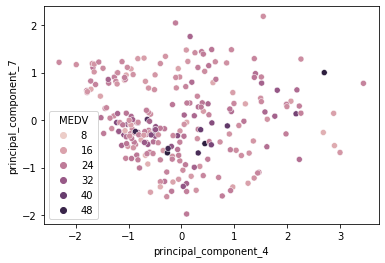

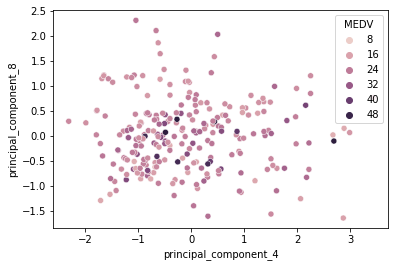

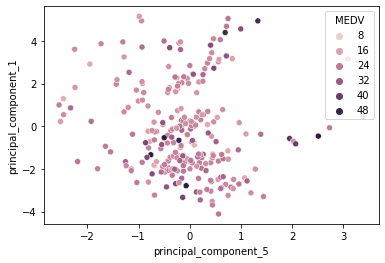

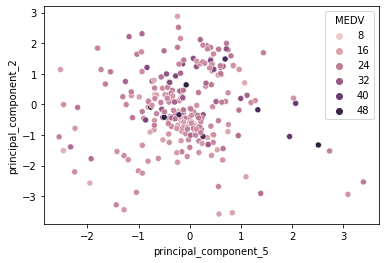

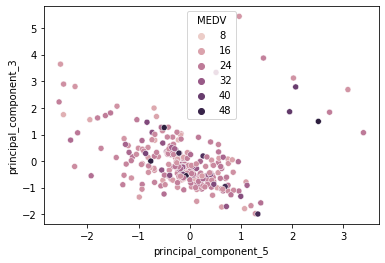

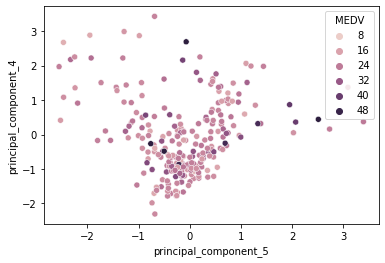

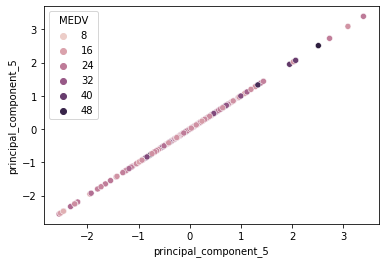

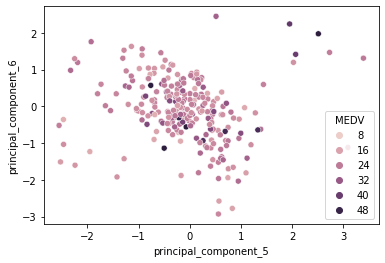

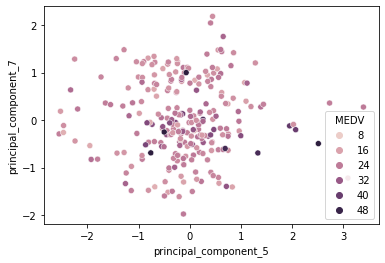

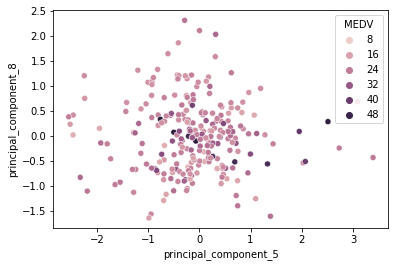

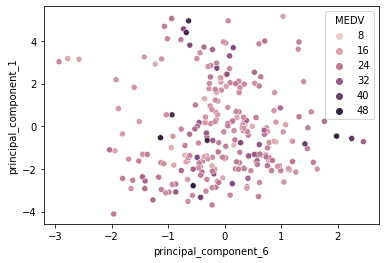

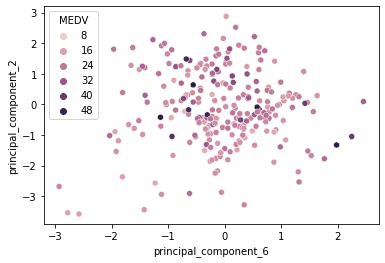

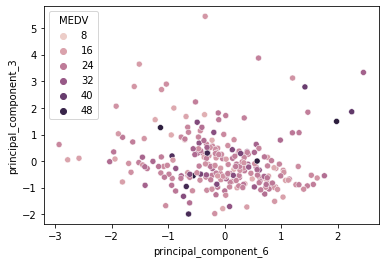

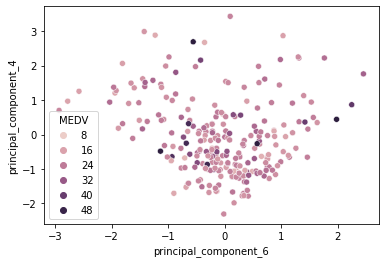

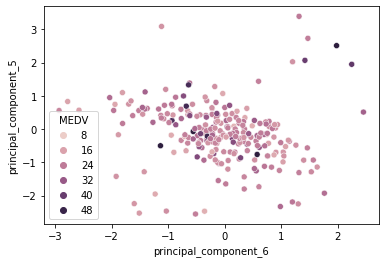

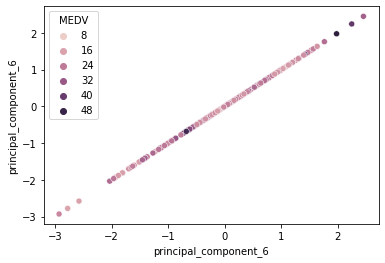

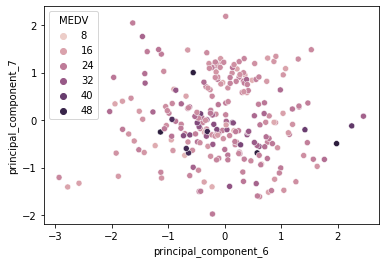

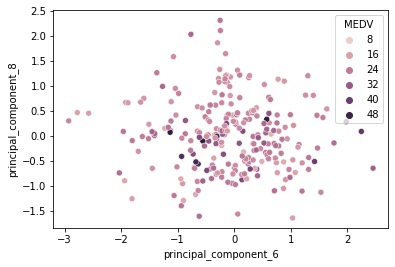

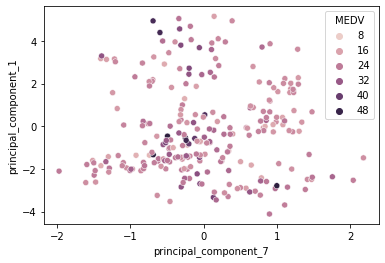

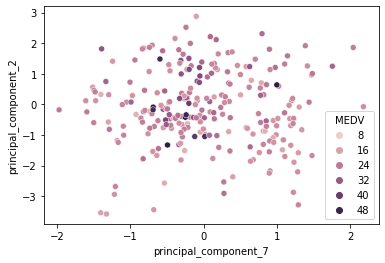

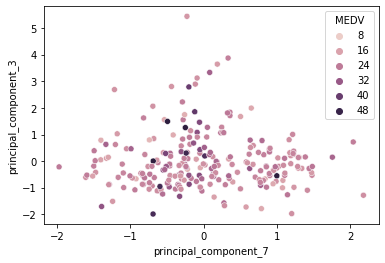

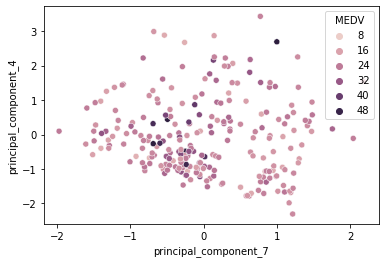

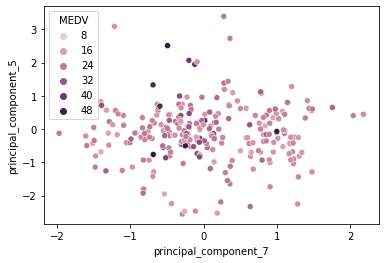

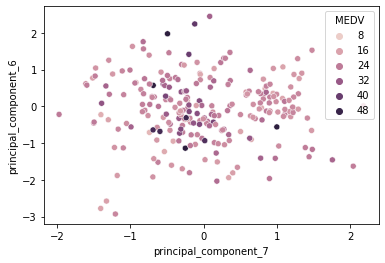

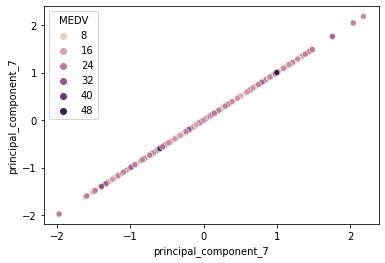

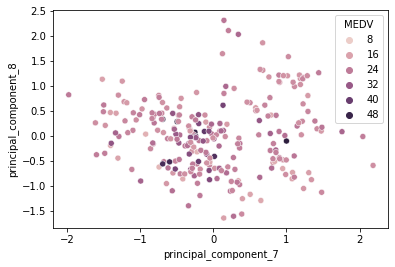

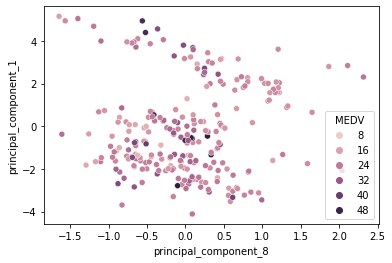

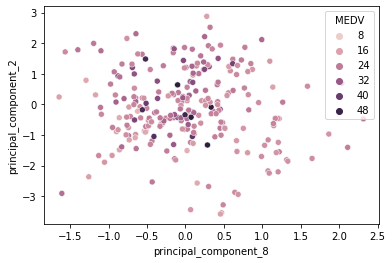

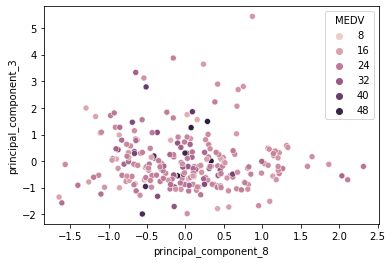

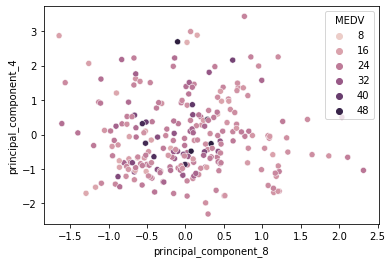

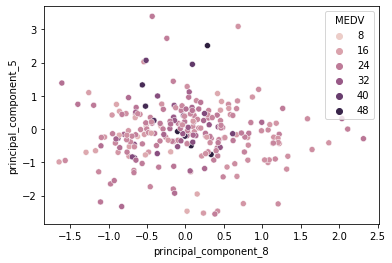

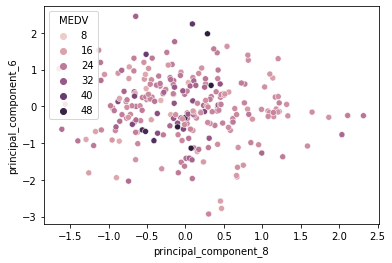

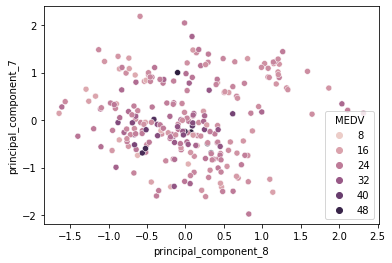

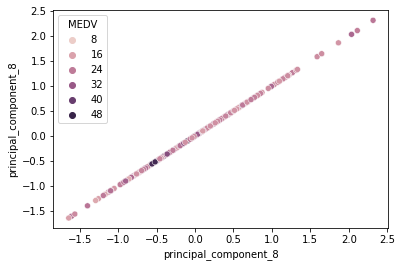

In [ ]:
p_col = principal_results_Df.columns
plt.figure(figsize=(5,5))
for i in p_col:
  for j in p_col:
    sns.scatterplot(data=principal_results_Df, x=i, y=j, hue = new_medv)
    plt.show()

In [ ]:
plt.figure(figsize=(10,10))
var = pca_results_revised.explained_variance_ratio_.sum()

fig = px.scatter_3d(principalComponents_results, x=0, y=1, z=2, color = new_medv,title=f'Total Explained Variance: {var}',
labels={'0':'PC1', '1':'PC2', '2':'PC3'})
fig.show()

<Figure size 720x720 with 0 Axes>

<b>Splitting the data in train and test sets

In [ ]:
# Create the data of independent variables
X = principal_results_Df

# Create the dependent variable data
y = new_medv

In [ ]:
#Importing RFE and Linear Regression 
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#<b>Linear Regression

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
linear_reg =  LinearRegression()

#Aplly model on train dataset
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#model score on train dataset
linear_reg.score(X_train, y_train)

0.603582742609758

In [ ]:
#predicted value of train and test dataset
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

<b>Linear Regression Model Evaluation

In [ ]:
#Train Data Evaluation Metrics 
lr_train_mse  = mean_squared_error((y_train), (y_pred_train))
print("Train MSE :" , lr_train_mse)

lr_train_r2 = r2_score((y_train), (y_pred_train))
print("Train R2 :" ,lr_train_r2) 

lr_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)

Train MSE : 22.797593280350664
Train R2 : 0.603582742609758
Train Adjusted R2 :  0.5914320220767237


In [ ]:
lr_test_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE :" , lr_test_mse)

lr_test_r2 = r2_score((y_test), (y_pred_test))
print("Test R2 :" ,lr_test_r2)

lr_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_test_r2_)

Test MSE : 14.699034157545722
Test R2 : 0.7612828694731032
Test Adjusted R2 :  0.7289144449948799


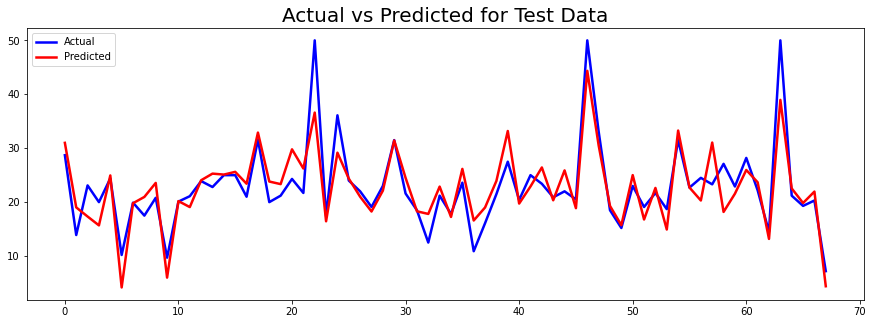

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (15,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

#<b>Running Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)

In [ ]:
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.596e+02, tolerance: 1.195e+00

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.054e+01, tolerance: 1.347e+00

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.189e+02, tolerance: 1.319e+00



GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}
The R2 score using the same alpha is : 0.5728272793399203


**The best parameters for the LASSO Regression which we already tested before to save time when running it again.**
* The best fit alpha value is found out to be : {'alpha': 0.1}

In [ ]:
lasso_regressor.score(X_train, y_train)

0.603582742609758

In [ ]:
y_pred_lasso_train = lasso_regressor.predict(X_train)
y_pred_lasso_test = lasso_regressor.predict(X_test)

<b>Lasso Regression Model Evaluation

In [ ]:
lasso_train_mse  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , lasso_train_mse)

lasso_train_r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,lasso_train_r2)

lasso_train_r2_= 1-(1-r2_score(y_train, y_pred_lasso_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", lasso_train_r2)

Train MSE : 22.797593280350668
Train R2 : 0.603582742609758
Train Adjusted R2 :  0.603582742609758


In [ ]:
lasso_test_mse  = mean_squared_error(y_test, y_pred_lasso_test)
print("Test MSE :" , lasso_test_mse)

lasso_test_r2 = r2_score(y_test, y_pred_lasso_test)
print("Test R2 :" ,lasso_test_r2)

lasso_test_r2_= 1-(1-r2_score(y_test, y_pred_lasso_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", lasso_test_r2_)

Test MSE : 14.699034157545718
Test R2 : 0.7612828694731033
Test Adjusted R2 :  0.72891444499488


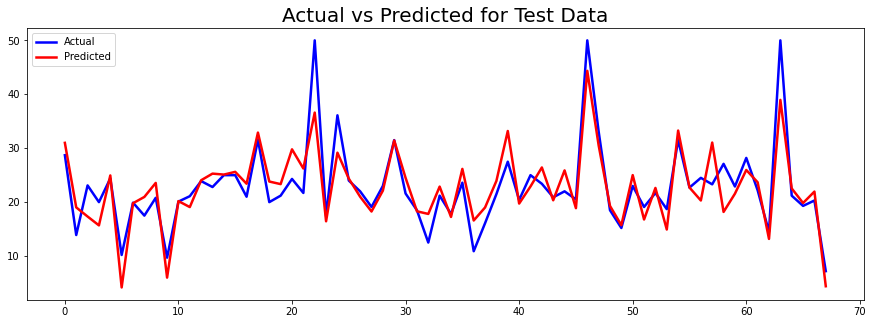

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (15,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_lasso_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

#<b>Running Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
#Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
print('The best fit alpha value is found out to be :' ,ridge_regressor.best_params_)
print('The R2 score using the same alpha is :', ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}
The R2 score using the same alpha is : 0.5737049213920276


**The best parameters for the RIDGE Regression which we already tested before to save time when running it again.**
* The best fit alpha value is found out to be : {'alpha': 30}

In [ ]:
y_pred_ridge_train=ridge_regressor.predict(X_train)
y_pred_ridge_test = ridge_regressor.predict(X_test)

<b>Ridge Regression Model Evaluation

In [ ]:
ridge_train_mse  = mean_squared_error(y_train, y_pred_ridge_train)
print("Train MSE :" , ridge_train_mse)

ridge_train_r2 = r2_score(y_train, y_pred_ridge_train)
print("Train R2 :" ,ridge_train_r2)

ridge_train_r2_= 1-(1-r2_score(y_train, y_pred_ridge_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", ridge_train_r2)

Train MSE : 22.824657360931194
Train R2 : 0.6031121372934166
Train Adjusted R2 :  0.6031121372934166


In [ ]:
ridge_test_mse  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , ridge_test_mse)

ridge_test_r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,ridge_test_r2)

ridge_test_r2_= 1-(1-r2_score(y_test, y_pred_ridge_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", ridge_test_r2_)

Test MSE : 14.590751241680838
Test R2 : 0.7630414195032139
Test Adjusted R2 :  0.7309114424867005


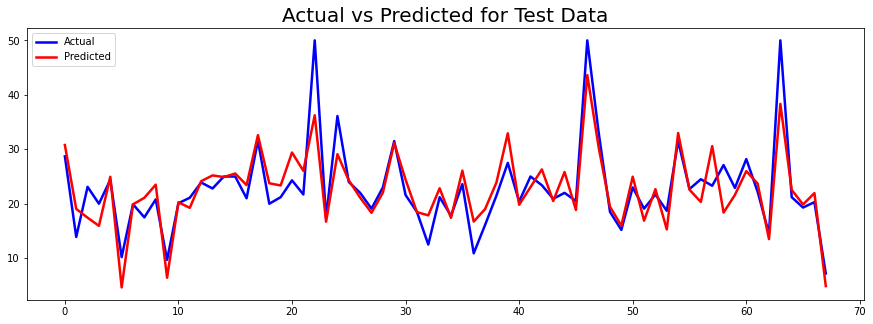

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (15,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_ridge_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

#<b>Running Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
#Cross validation
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='r2', cv=5)
elastic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.844e+01, tolerance: 1.195e+00

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.220e+03, tolerance: 1.347e+00

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.179e+02, tolerance: 1.319e+00

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
print('The best fit alpha value is found out to be :' ,elastic_regressor.best_params_)
print('The R2 score using the same alpha is :', elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}
The R2 score using the same alpha is : 0.573007313963048


**The best parameters for the ElasticNet Regression which we already tested before to save time when running it again.**
* The best fit alpha value is found out to be : {'alpha': 0.1}

In [ ]:
y_pred_elastic_train = elastic_regressor.predict(X_train)
y_pred_elastic_test = elastic_regressor.predict(X_test)

<b>ElasticNet Regression Model Evaluation

In [ ]:
elastic_train_mse  = mean_squared_error(y_train, y_pred_elastic_train)
print("Train MSE :" , elastic_train_mse)

elastic_train_r2 = r2_score(y_train, y_pred_elastic_train)
print("Train R2 :" ,elastic_train_r2)

elastic_train_r2_= 1-(1-r2_score(y_train, y_pred_elastic_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", elastic_train_r2)

Train MSE : 22.79887461873768
Train R2 : 0.603560461983776
Train Adjusted R2 :  0.603560461983776


In [ ]:
elastic_test_mse  = mean_squared_error(y_test, y_pred_elastic_test)
print("Test MSE :" , elastic_test_mse)

elastic_test_r2 = r2_score(y_test, y_pred_elastic_test)
print("Test R2 :" ,elastic_test_r2)

elastic_test_r2_= 1-(1-r2_score(y_test, y_pred_elastic_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", elastic_test_r2_)

Test MSE : 14.655999396454472
Test R2 : 0.7619817680925979
Test Adjusted R2 :  0.7297081095288823


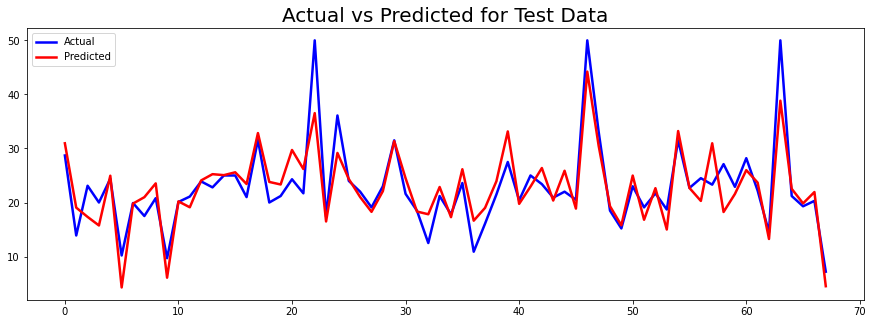

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (15,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_elastic_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

#<b>Evaluating the models
Models Summary for the Train data.

In [ ]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression']
train_mse= [lr_train_mse, lasso_train_mse, ridge_train_mse, elastic_train_mse]
train_r2= [lr_train_r2, lasso_train_r2, ridge_train_r2, elastic_train_r2]
train_adjusted_r2= [lr_train_r2_, lasso_train_r2_, ridge_train_r2_, elastic_train_r2_]

<b>Models Summary for the test data.

In [ ]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression']
test_mse= [lr_test_mse, lasso_test_mse, ridge_test_mse, elastic_test_mse]
test_r2= [lr_test_r2, lasso_test_r2, ridge_test_r2, elastic_test_r2]
test_adjusted_r2= [lr_test_r2_, lasso_test_r2_, ridge_test_r2_, elastic_test_r2_]

<b>Model Comparison & Selection

In [ ]:
#Creating a comparision dataframe
model_comparison = pd.DataFrame({'Model Name': models,
                          'Train MSE': train_mse,'Test MSE': test_mse,
                          'Train R^2': train_r2, 'Test R^2': test_r2,
                          'Train Adjusted R^2': train_adjusted_r2, 'Test Adjusted R^2': test_adjusted_r2})
model_comparison

,Model Name,Train MSE,Test MSE,Train R^2,Test R^2,Train Adjusted R^2,Test Adjusted R^2
0,Linear Regression,22.797593,14.699034,0.603583,0.761283,0.591432,0.728914
1,Lasso Regression,22.797593,14.699034,0.603583,0.761283,0.591432,0.728914
2,Ridge Regression,22.824657,14.590751,0.603112,0.763041,0.590947,0.730911
3,ElasticNet Regression,22.798875,14.655999,0.603560,0.761982,0.591409,0.729708


#**Conclusion**
* We can see that MSE and R2 and Adjusted R2 which are the metrics used to evaluate the performance of regression model of **Linear Regression, Lasso, Ridge, and ElasticNet.**
* From above table we can conclude that **Ridge Regression (73%)** is the best models as compare to the other models.